In [149]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Fetch data

In [150]:
b2c_sales_df = pd.read_csv('/Users/nitinnandansingh/Documents/workspace/AboutYouLogisticsTask/assets/b2c_items_sales_forecast - b2c_items_sales_forecast.csv')
scd_sales_df = pd.read_csv('/Users/nitinnandansingh/Documents/workspace/AboutYouLogisticsTask/assets/scd_items_sales_foreecast - scd_items_sales_forecast.csv')
icd_sales_df = pd.read_csv('/Users/nitinnandansingh/Documents/workspace/AboutYouLogisticsTask/assets/icd_items_sales_forecast - icd_items_sales_forecast.csv')
it_cd_shift_df = pd.read_csv('/Users/nitinnandansingh/Documents/workspace/AboutYouLogisticsTask/assets/item_cross_docking_shift - item_cross_docking_shift.csv')
it_blocked_df = pd.read_csv('/Users/nitinnandansingh/Documents/workspace/AboutYouLogisticsTask/assets/items_blocked_per_cd_item - items_blocked_per_cd_item.csv')

In [151]:
# to perform analysis on dates, i will first convert date values in to datetime. This information I gathered after performing some analyses beforehand.

b2c_sales_df['date'] = pd.to_datetime(b2c_sales_df['date'])
b2c_sales_df['forecast_date'] = pd.to_datetime(b2c_sales_df['forecast_date'])

scd_sales_df['date'] = pd.to_datetime(scd_sales_df['date'])
scd_sales_df['forecast_date'] = pd.to_datetime(scd_sales_df['forecast_date'])


icd_sales_df['date'] = pd.to_datetime(icd_sales_df['date'])
icd_sales_df['forecast_date'] = pd.to_datetime(icd_sales_df['forecast_date'])


it_cd_shift_df['exported_at_picking_warehouse'] = pd.to_datetime(it_cd_shift_df['exported_at_picking_warehouse'])


it_blocked_df['date'] = pd.to_datetime(it_blocked_df['date'])

### B2C items sales forecast

This dataset gives information about the number of items forecasted to be shipped from a shipping warehouse on a particular date.
b2c_sales_df is a mix of both regular B2C orders and B2C with ICD orders.

In [152]:
print(b2c_sales_df.shape)
b2c_sales_df.head()

(10556, 7)


,forecast_date,version,scenario_id,date,planning_shop_cluster,shipping_wh,sales_forecast_items
0,2024-06-04,1,0,2024-05-27,AT,1,2277
1,2024-06-04,1,0,2024-05-27,AT,2,0
2,2024-06-04,1,0,2024-05-27,AT,4,0
3,2024-06-04,1,0,2024-05-27,AT,3,0
4,2024-06-04,1,0,2024-05-28,AT,3,0


In [153]:
b2c_sales_df.columns

Index(['forecast_date', 'version', 'scenario_id', 'date',
       'planning_shop_cluster', 'shipping_wh', 'sales_forecast_items'],
      dtype='object')

In [154]:
b2c_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10556 entries, 0 to 10555
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   forecast_date          10556 non-null  datetime64[ns]
 1   version                10556 non-null  int64         
 2   scenario_id            10556 non-null  int64         
 3   date                   10556 non-null  datetime64[ns]
 4   planning_shop_cluster  10556 non-null  object        
 5   shipping_wh            10556 non-null  int64         
 6   sales_forecast_items   10556 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 577.4+ KB


The date columns might need to be converted into datetime type

In [155]:
b2c_sales_df.describe(include='all').fillna('')

,forecast_date,version,scenario_id,date,planning_shop_cluster,shipping_wh,sales_forecast_items
count,10556,10556.0,10556.0,10556,10556,10556.0,10556.0
unique,,,,,29,,
top,,,,,AT,,
freq,,,,,364,,
mean,2024-06-04 00:00:00,1.0,0.0,2024-07-11 00:00:00,,2.5,573.839428
min,2024-06-04 00:00:00,1.0,0.0,2024-05-27 00:00:00,,1.0,0.0
25%,2024-06-04 00:00:00,1.0,0.0,2024-06-18 00:00:00,,1.75,0.0
50%,2024-06-04 00:00:00,1.0,0.0,2024-07-11 00:00:00,,2.5,0.0
75%,2024-06-04 00:00:00,1.0,0.0,2024-08-03 00:00:00,,3.25,4.0
max,2024-06-04 00:00:00,1.0,0.0,2024-08-25 00:00:00,,4.0,38967.0


In [156]:
b2c_sales_df.isnull().sum()

forecast_date            0
version                  0
scenario_id              0
date                     0
planning_shop_cluster    0
shipping_wh              0
sales_forecast_items     0
dtype: int64

In [157]:
print(b2c_sales_df.forecast_date.min(), b2c_sales_df.forecast_date.max())

2024-06-04 00:00:00 2024-06-04 00:00:00


In [158]:
print(b2c_sales_df.date.min(), b2c_sales_df.date.max())

2024-05-27 00:00:00 2024-08-25 00:00:00


In [159]:
b2c_sales_df.date.max()-b2c_sales_df.date.min()

Timedelta('90 days 00:00:00')

The dates range from 27 May 2024 to 25 August 2024, 91 days in total

In [160]:
b2c_sales_df['version'].unique()

array([1])

There is only one value in version column -> 1 (one)

In [161]:
b2c_sales_df['scenario_id'].unique()

array([0])

There is only one value in scenario_id column -> 0 (zero)

In [162]:
print(len(b2c_sales_df['planning_shop_cluster'].unique()))
b2c_sales_df['planning_shop_cluster'].unique()


29


array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI',
       'FR', 'GR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'NL', 'NO',
       'PL', 'PT', 'RO', 'SE', 'SI', 'SK', 'ZZ'], dtype=object)

This appears to be code for different countries

In [163]:
b2c_sales_df['planning_shop_cluster'].value_counts()

planning_shop_cluster
AT    364
IE    364
SK    364
SI    364
SE    364
RO    364
PT    364
PL    364
NO    364
NL    364
LV    364
LU    364
LT    364
IT    364
HU    364
BE    364
HR    364
GR    364
FR    364
FI    364
ES    364
EE    364
DK    364
DE    364
CZ    364
CY    364
CH    364
BG    364
ZZ    364
Name: count, dtype: int64

In [164]:
len(b2c_sales_df['planning_shop_cluster'].unique())*364

10556

It appears that for each country there are 364 records. making it 10556 records in all which corresponds with the size of the dataset.

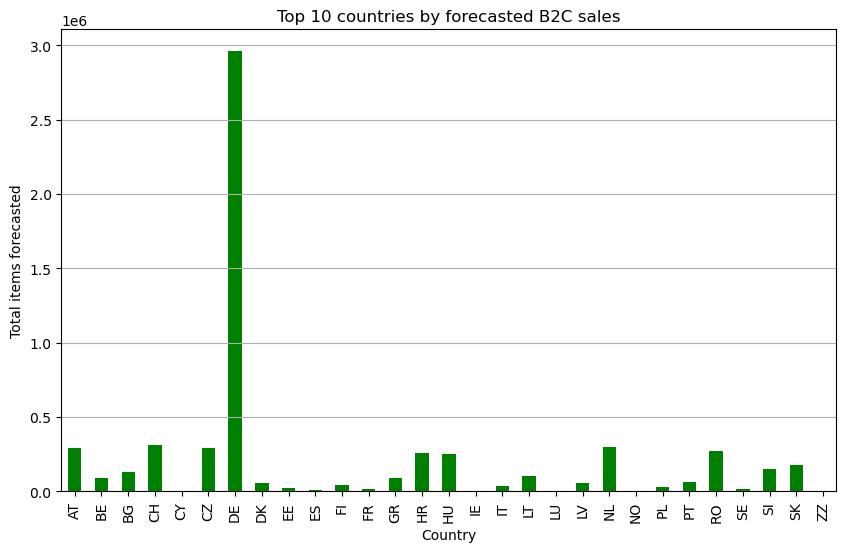

In [222]:
# Plot for sales forecast for each country
top_countries = b2c_sales_df.groupby('planning_shop_cluster')['sales_forecast_items'].sum()
top_countries.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Top 10 countries by forecasted B2C sales')
plt.ylabel('Total items forecasted')
plt.xlabel('Country')
plt.grid(axis='y')
plt.show()

In [165]:
b2c_sales_df['shipping_wh'].unique()

array([1, 2, 4, 3])

There are 4 shipping warehouses

In [166]:
print(b2c_sales_df['sales_forecast_items'].min(),b2c_sales_df['sales_forecast_items'].max())

0 38967


In [167]:
b2c_sales_df.head(16)

,forecast_date,version,scenario_id,date,planning_shop_cluster,shipping_wh,sales_forecast_items
0,2024-06-04,1,0,2024-05-27,AT,1,2277
1,2024-06-04,1,0,2024-05-27,AT,2,0
2,2024-06-04,1,0,2024-05-27,AT,4,0
3,2024-06-04,1,0,2024-05-27,AT,3,0
4,2024-06-04,1,0,2024-05-28,AT,3,0
5,2024-06-04,1,0,2024-05-28,AT,4,0
6,2024-06-04,1,0,2024-05-28,AT,1,2459
7,2024-06-04,1,0,2024-05-28,AT,2,0
8,2024-06-04,1,0,2024-05-29,AT,1,3056
9,2024-06-04,1,0,2024-05-29,AT,4,0


There are 4 rows for each date per country out of which one(or more) indicates a non-zero value in sales_forecast_items. It could indicate that no sales are forecasted for warehouses and dates that has sales_forecast_items as 0

In [168]:
# countries * 91 days * records for each date
len(b2c_sales_df['planning_shop_cluster'].unique())*91*4

10556

In [169]:
b2c_sales_df[b2c_sales_df['planning_shop_cluster']=='GR'].head(10)

,forecast_date,version,scenario_id,date,planning_shop_cluster,shipping_wh,sales_forecast_items
4368,2024-06-04,1,0,2024-05-27,GR,3,0
4369,2024-06-04,1,0,2024-05-27,GR,2,421
4370,2024-06-04,1,0,2024-05-27,GR,4,0
4371,2024-06-04,1,0,2024-05-27,GR,1,0
4372,2024-06-04,1,0,2024-05-28,GR,3,0
4373,2024-06-04,1,0,2024-05-28,GR,2,458
4374,2024-06-04,1,0,2024-05-28,GR,1,0
4375,2024-06-04,1,0,2024-05-28,GR,4,0
4376,2024-06-04,1,0,2024-05-29,GR,4,0
4377,2024-06-04,1,0,2024-05-29,GR,1,0


Upon manual inspection I found that the shipping warehouse is one or more than one for each country, for which there is non-zero value in sales_forecast_items column.

### SCD Items Sales Forecast

In [170]:
print(scd_sales_df.shape)
scd_sales_df.head()

(42224, 8)


,forecast_date,version,scenario_id,date,planning_shop_cluster,shipping_wh,picking_wh,shipment_cd
0,2024-06-04,1,0,2024-07-22,CZ,3,3,0
1,2024-06-04,1,0,2024-05-31,HU,3,3,0
2,2024-06-04,1,0,2024-08-24,NO,3,3,0
3,2024-06-04,1,0,2024-07-15,FI,4,3,0
4,2024-06-04,1,0,2024-06-30,FR,4,3,0


In [171]:
scd_sales_df.columns

Index(['forecast_date', 'version', 'scenario_id', 'date',
       'planning_shop_cluster', 'shipping_wh', 'picking_wh', 'shipment_cd'],
      dtype='object')

In [172]:
scd_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42224 entries, 0 to 42223
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   forecast_date          42224 non-null  datetime64[ns]
 1   version                42224 non-null  int64         
 2   scenario_id            42224 non-null  int64         
 3   date                   42224 non-null  datetime64[ns]
 4   planning_shop_cluster  42224 non-null  object        
 5   shipping_wh            42224 non-null  int64         
 6   picking_wh             42224 non-null  int64         
 7   shipment_cd            42224 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 2.6+ MB


In [173]:
scd_sales_df.describe(include='all').fillna('')

,forecast_date,version,scenario_id,date,planning_shop_cluster,shipping_wh,picking_wh,shipment_cd
count,42224,42224.0,42224.0,42224,42224,42224.0,42224.0,42224.0
unique,,,,,29,,,
top,,,,,CZ,,,
freq,,,,,1456,,,
mean,2024-06-04 00:00:00,1.0,0.0,2024-07-11 00:00:00,,2.5,2.5,23.034104
min,2024-06-04 00:00:00,1.0,0.0,2024-05-27 00:00:00,,1.0,1.0,0.0
25%,2024-06-04 00:00:00,1.0,0.0,2024-06-18 00:00:00,,1.75,1.75,0.0
50%,2024-06-04 00:00:00,1.0,0.0,2024-07-11 00:00:00,,2.5,2.5,0.0
75%,2024-06-04 00:00:00,1.0,0.0,2024-08-03 00:00:00,,3.25,3.25,0.0
max,2024-06-04 00:00:00,1.0,0.0,2024-08-25 00:00:00,,4.0,4.0,2942.0


In [174]:
scd_sales_df['forecast_date'].unique()

<DatetimeArray>
['2024-06-04 00:00:00']
Length: 1, dtype: datetime64[ns]

In [175]:
scd_sales_df['version'].unique(), scd_sales_df['scenario_id'].unique()

(array([1]), array([0]))

In [176]:
print(scd_sales_df.date.min(), scd_sales_df.date.max()), 
scd_sales_df.date.max()-scd_sales_df.date.min()

2024-05-27 00:00:00 2024-08-25 00:00:00


Timedelta('90 days 00:00:00')

In [177]:
print(len(scd_sales_df.planning_shop_cluster.unique()))
scd_sales_df.planning_shop_cluster.unique()

29


array(['CZ', 'HU', 'NO', 'FI', 'FR', 'IT', 'LT', 'LV', 'SK', 'CH', 'ZZ',
       'GR', 'CY', 'LU', 'PT', 'SE', 'HR', 'NL', 'DK', 'RO', 'DE', 'SI',
       'ES', 'BG', 'EE', 'BE', 'PL', 'IE', 'AT'], dtype=object)

In [178]:
scd_sales_df.shipping_wh.unique(), scd_sales_df.picking_wh.unique()

(array([3, 4, 1, 2]), array([3, 4, 1, 2]))

In [179]:
print(scd_sales_df.shipment_cd.min(),scd_sales_df.shipment_cd.max())

0 2942


In [180]:
# Sanity check. For scd there should not be any items forecasted where shipping and picking warehouses are the same.
scd_sales_df[(scd_sales_df['picking_wh']==scd_sales_df['shipping_wh']) & scd_sales_df['shipment_cd']!=0]

,forecast_date,version,scenario_id,date,planning_shop_cluster,shipping_wh,picking_wh,shipment_cd


### ICD items sales forecast

In [181]:
print(icd_sales_df.shape)
icd_sales_df.head()

(42224, 8)


,forecast_date,version,scenario_id,date,planning_shop_cluster,shipping_wh,picking_wh,item_cd
0,2024-06-04,1,0,2024-07-22,CZ,3,3,0
1,2024-06-04,1,0,2024-05-31,HU,3,3,0
2,2024-06-04,1,0,2024-08-24,NO,3,3,0
3,2024-06-04,1,0,2024-07-15,FI,4,3,0
4,2024-06-04,1,0,2024-06-30,FR,4,3,0


In [182]:
icd_sales_df.columns

Index(['forecast_date', 'version', 'scenario_id', 'date',
       'planning_shop_cluster', 'shipping_wh', 'picking_wh', 'item_cd'],
      dtype='object')

The columns are similar to those from b2c sales df except for 2 columns -> picking_wh and item_cd

In [183]:
icd_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42224 entries, 0 to 42223
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   forecast_date          42224 non-null  datetime64[ns]
 1   version                42224 non-null  int64         
 2   scenario_id            42224 non-null  int64         
 3   date                   42224 non-null  datetime64[ns]
 4   planning_shop_cluster  42224 non-null  object        
 5   shipping_wh            42224 non-null  int64         
 6   picking_wh             42224 non-null  int64         
 7   item_cd                42224 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 2.6+ MB


In [184]:
icd_sales_df.describe(include='all').fillna('')

,forecast_date,version,scenario_id,date,planning_shop_cluster,shipping_wh,picking_wh,item_cd
count,42224,42224.0,42224.0,42224,42224,42224.0,42224.0,42224.0
unique,,,,,29,,,
top,,,,,CZ,,,
freq,,,,,1456,,,
mean,2024-06-04 00:00:00,1.0,0.0,2024-07-11 00:00:00,,2.5,2.5,32.137623
min,2024-06-04 00:00:00,1.0,0.0,2024-05-27 00:00:00,,1.0,1.0,0.0
25%,2024-06-04 00:00:00,1.0,0.0,2024-06-18 00:00:00,,1.75,1.75,0.0
50%,2024-06-04 00:00:00,1.0,0.0,2024-07-11 00:00:00,,2.5,2.5,0.0
75%,2024-06-04 00:00:00,1.0,0.0,2024-08-03 00:00:00,,3.25,3.25,0.0
max,2024-06-04 00:00:00,1.0,0.0,2024-08-25 00:00:00,,4.0,4.0,5277.0


In [185]:
icd_sales_df.isnull().sum()

forecast_date            0
version                  0
scenario_id              0
date                     0
planning_shop_cluster    0
shipping_wh              0
picking_wh               0
item_cd                  0
dtype: int64

In [186]:
icd_sales_df['date'].min(), icd_sales_df['date'].max()

(Timestamp('2024-05-27 00:00:00'), Timestamp('2024-08-25 00:00:00'))

In [187]:
icd_sales_df['date'].max()-icd_sales_df['date'].min()

Timedelta('90 days 00:00:00')

The date range is same as b2c sales df.

In [188]:
icd_sales_df['version'].unique(), icd_sales_df['scenario_id'].unique()

(array([1]), array([0]))

The version column and scenario column also are same as b2c sales df

In [189]:
print(len(icd_sales_df['planning_shop_cluster'].unique()))
icd_sales_df['planning_shop_cluster'].unique()

29


array(['CZ', 'HU', 'NO', 'FI', 'FR', 'IT', 'LT', 'LV', 'SK', 'CH', 'ZZ',
       'GR', 'CY', 'LU', 'PT', 'SE', 'HR', 'NL', 'DK', 'RO', 'DE', 'SI',
       'ES', 'BG', 'EE', 'BE', 'PL', 'IE', 'AT'], dtype=object)

In [190]:
icd_sales_df['planning_shop_cluster'].value_counts()

planning_shop_cluster
CZ    1456
SE    1456
IE    1456
PL    1456
BE    1456
EE    1456
BG    1456
ES    1456
SI    1456
DE    1456
RO    1456
DK    1456
NL    1456
HR    1456
PT    1456
HU    1456
LU    1456
CY    1456
GR    1456
ZZ    1456
CH    1456
SK    1456
LV    1456
LT    1456
IT    1456
FR    1456
FI    1456
NO    1456
AT    1456
Name: count, dtype: int64

There are same number of countries (29) but each with 1456 values.

In [191]:
icd_sales_df['shipping_wh'].unique()

array([3, 4, 1, 2])

In [192]:
icd_sales_df['picking_wh'].unique()

array([3, 4, 1, 2])

In shipping wh and picking_wh there are 4 unique values -> 1,2,3,4

In [193]:
icd_sales_df[(icd_sales_df['picking_wh']==icd_sales_df['shipping_wh']) & icd_sales_df['item_cd']!=0]

,forecast_date,version,scenario_id,date,planning_shop_cluster,shipping_wh,picking_wh,item_cd


This is for the sanity check that, when picking and shipping warehouses are the same , no cross docking at required.

In [195]:
filtered_df = icd_sales_df[(icd_sales_df['shipping_wh'] != icd_sales_df['picking_wh']) & (icd_sales_df['item_cd'] != 0)]
filtered_df.head(5)

,forecast_date,version,scenario_id,date,planning_shop_cluster,shipping_wh,picking_wh,item_cd
10,2024-06-04,1,0,2024-08-18,CH,1,3,279
13,2024-06-04,1,0,2024-06-07,GR,2,3,81
36,2024-06-04,1,0,2024-07-10,SE,1,2,11
49,2024-06-04,1,0,2024-08-24,GR,2,3,38
50,2024-06-04,1,0,2024-07-23,SK,2,3,110


This gives a snippet of data in which pure cross-docking is taking place.

### Item cross-docking shift

This dataset gives information about the delay in export after picking and what proportion of items are exported after the delay.

In [196]:
print(it_cd_shift_df.shape)
it_cd_shift_df.head(10)

(5544, 5)


,exported_at_picking_warehouse,picking_warehouse_id,shipping_warehouse_id,day,share
0,2024-05-27,1,2,0,0.02
1,2024-05-27,1,2,1,0.23
2,2024-05-27,1,2,2,0.61
3,2024-05-27,1,2,3,0.14
4,2024-05-27,1,2,4,0.00
5,2024-05-27,1,2,5,0.00
6,2024-05-27,1,2,6,0.00
7,2024-05-27,1,3,0,0.01
8,2024-05-27,1,3,1,0.32
9,2024-05-27,1,3,2,0.67


In [197]:
it_cd_shift_df.columns

Index(['exported_at_picking_warehouse', 'picking_warehouse_id',
       'shipping_warehouse_id', 'day', 'share'],
      dtype='object')

In [198]:
it_cd_shift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   exported_at_picking_warehouse  5544 non-null   datetime64[ns]
 1   picking_warehouse_id           5544 non-null   int64         
 2   shipping_warehouse_id          5544 non-null   int64         
 3   day                            5544 non-null   int64         
 4   share                          5544 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 216.7 KB


In [199]:
it_cd_shift_df.describe(include='all').fillna('')

,exported_at_picking_warehouse,picking_warehouse_id,shipping_warehouse_id,day,share
count,5544,5544.00000,5544.00000,5544.00000,5544.000000
mean,2024-07-31 12:00:00.000000256,2.00000,2.00000,3.00000,0.142857
min,2024-05-27 00:00:00,1.00000,1.00000,0.00000,0.000000
25%,2024-06-28 18:00:00,1.00000,1.00000,1.00000,0.000000
50%,2024-07-31 12:00:00,2.00000,2.00000,3.00000,0.000000
75%,2024-09-02 06:00:00,3.00000,3.00000,5.00000,0.281250
max,2024-10-05 00:00:00,3.00000,3.00000,6.00000,1.000000
std,,0.81657,0.81657,2.00018,0.229351


In [200]:
it_cd_shift_df.isnull().sum()

exported_at_picking_warehouse    0
picking_warehouse_id             0
shipping_warehouse_id            0
day                              0
share                            0
dtype: int64

In [201]:
it_cd_shift_df['exported_at_picking_warehouse'].min(),it_cd_shift_df['exported_at_picking_warehouse'].max()

(Timestamp('2024-05-27 00:00:00'), Timestamp('2024-10-05 00:00:00'))

In [202]:
it_cd_shift_df['exported_at_picking_warehouse'].max()-it_cd_shift_df['exported_at_picking_warehouse'].min()

Timedelta('131 days 00:00:00')

In [203]:
it_cd_shift_df['picking_warehouse_id'].unique(),it_cd_shift_df['shipping_warehouse_id'].unique() 

(array([1, 2, 3]), array([2, 3, 1]))

In [204]:
it_cd_shift_df.head(20)

,exported_at_picking_warehouse,picking_warehouse_id,shipping_warehouse_id,day,share
0,2024-05-27,1,2,0,0.02
1,2024-05-27,1,2,1,0.23
2,2024-05-27,1,2,2,0.61
3,2024-05-27,1,2,3,0.14
4,2024-05-27,1,2,4,0.00
5,2024-05-27,1,2,5,0.00
6,2024-05-27,1,2,6,0.00
7,2024-05-27,1,3,0,0.01
8,2024-05-27,1,3,1,0.32
9,2024-05-27,1,3,2,0.67


Upon visual inspection it turns out that this table gives the delay in days and the share is the proportion of item shipped in those many days of delay.

In [205]:
it_cd_shift_df['day'].unique()

array([0, 1, 2, 3, 4, 5, 6])

### Items blocked per CD item

In [206]:
print(it_blocked_df.shape)
it_blocked_df.head()

(70012, 4)


,date,shipping_wh,country_code,items_per_cross_docking_cd_item
0,2023-03-01,1,AT,3.17
1,2023-03-01,2,AT,3.17
2,2023-03-01,3,AT,3.17
3,2023-03-01,4,AT,3.17
4,2023-03-01,1,BE,2.78


In [207]:
it_blocked_df.columns

Index(['date', 'shipping_wh', 'country_code',
       'items_per_cross_docking_cd_item'],
      dtype='object')

In [208]:
it_blocked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70012 entries, 0 to 70011
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             70012 non-null  datetime64[ns]
 1   shipping_wh                      70012 non-null  int64         
 2   country_code                     70012 non-null  object        
 3   items_per_cross_docking_cd_item  70012 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [209]:
it_blocked_df.describe(include='all').fillna('')

,date,shipping_wh,country_code,items_per_cross_docking_cd_item
count,70012,70012.0,70012,70012.0
unique,,,31,
top,,,AT,
freq,,,2260,
mean,2023-12-08 00:49:21.777981184,2.5,,2.091758
min,2023-03-01 00:00:00,1.0,,1.2
25%,2023-07-20 00:00:00,1.75,,1.67
50%,2023-12-08 00:00:00,2.5,,2.17
75%,2024-04-27 00:00:00,3.25,,2.51
max,2024-09-15 00:00:00,4.0,,3.17


In [210]:
it_blocked_df.isnull().sum()

date                               0
shipping_wh                        0
country_code                       0
items_per_cross_docking_cd_item    0
dtype: int64

In [211]:
it_blocked_df['date'].min(),it_blocked_df['date'].max()

(Timestamp('2023-03-01 00:00:00'), Timestamp('2024-09-15 00:00:00'))

In [212]:
it_blocked_df['shipping_wh'].unique()

array([1, 2, 3, 4])

In [213]:
print(len(it_blocked_df['country_code'].unique()))
it_blocked_df['country_code'].unique()

31


array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI',
       'FR', 'GR', 'HR', 'HU', 'IE', 'IL', 'IT', 'LT', 'LU', 'LV', 'NL',
       'NO', 'PL', 'PT', 'RO', 'SA', 'SE', 'SI', 'SK', 'ZZ'], dtype=object)

In this dataset, the number of countries is 31 where as in previous datasets it was 29.m

In [214]:
set(it_blocked_df['country_code'].unique()) - set(b2c_sales_df['planning_shop_cluster'].unique())

{'IL', 'SA'}

Countries with code IL and SA are the ones which are extra in it_blocked_df

In [215]:
it_blocked_df['items_per_cross_docking_cd_item'].min(),it_blocked_df['items_per_cross_docking_cd_item'].max()

(np.float64(1.2), np.float64(3.17))

#### Basic conclusions about the datasets

* No null records
* date columns need to be converted into datetime